In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_fraud = pd.read_csv("Automobile_insurance_fraud.csv")
print(df_fraud)

     months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \

In [3]:
df_fraud.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
df_fraud.shape

(1000, 40)

In [5]:
df_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
months_as_customer             1000 non-null int64
age                            1000 non-null int64
policy_number                  1000 non-null int64
policy_bind_date               1000 non-null object
policy_state                   1000 non-null object
policy_csl                     1000 non-null object
policy_deductable              1000 non-null int64
policy_annual_premium          1000 non-null float64
umbrella_limit                 1000 non-null int64
insured_zip                    1000 non-null int64
insured_sex                    1000 non-null object
insured_education_level        1000 non-null object
insured_occupation             1000 non-null object
insured_hobbies                1000 non-null object
insured_relationship           1000 non-null object
capital-gains                  1000 non-null int64
capital-loss                   1000 non-null int64
incident_date    

In [6]:
df_fraud.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [7]:
df_fraud.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [8]:
df_fraud.columns.to_series().groupby(df_fraud.dtypes).groups

{dtype('int64'): Index(['months_as_customer', 'age', 'policy_number', 'policy_deductable',
        'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss',
        'incident_hour_of_the_day', 'number_of_vehicles_involved',
        'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim',
        'property_claim', 'vehicle_claim', 'auto_year'],
       dtype='object'),
 dtype('float64'): Index(['policy_annual_premium', '_c39'], dtype='object'),
 dtype('O'): Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
        'insured_education_level', 'insured_occupation', 'insured_hobbies',
        'insured_relationship', 'incident_date', 'incident_type',
        'collision_type', 'incident_severity', 'authorities_contacted',
        'incident_state', 'incident_city', 'incident_location',
        'property_damage', 'police_report_available', 'auto_make', 'auto_model',
        'fraud_reported'],
       dtype='object')}

In [9]:
df_fraud.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [10]:
#_c39 column has all null values,so dropping it
df_fraud.drop(['_c39'],axis=1,inplace=True)

In [11]:
#Values counts 
for column in df_fraud.columns:
    print("********")
    print(column,":",df_fraud[column].unique())
    print(df_fraud[column].value_counts())

********
months_as_customer : [328 228 134 256 137 165  27 212 235 447  60 121 180 473  70 140 160 196
 460 217 370 413 237   8 257 202 224 241  64 166 155 114 149 147  62 289
 431 199  79 116  37 106 269 265 163 355 175 192 430  91 223 195  22 439
  94  11 151 154 245 119 215 295 254 107 478 128 338 271 222 120 270 319
 194 227 244  78 200 284 275 153  31  41 127  61 207 219  80 325  29 239
 279 350 464 118 298  87 261 453 210 168 390 258 225 164 255 206 203 211
 274  81 280 112  24  93 171 124 287 122 398 214 209  82 193 288 104 101
 375 461 428  45 136 216 278 108  14 276  47  73 294 324  53 426 111  86
 296 125 177 238 449 252 359  19 285  30 342 468 343 404  63 335 142 272
  69  38 281 246 330 362 371 377 172  99 249 190 174  95   2 117 242 440
  20 208 156 232  84 394  35 369 332 243 264  32 259 186 201 436 189 105
  88  40  59  39 123 231 247  48 267 286 253  10 158   1  85 233 266  97
 399 305 129 283  96 176 159 290 299  66 334 429  15 230 250  65 475  77
 229 110 292 451 150 

incident_type : ['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']
Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64
********
collision_type : ['Side Collision' '?' 'Rear Collision' 'Front Collision']
Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64
********
incident_severity : ['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']
Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64
********
authorities_contacted : ['Police' 'None' 'Fire' 'Other' 'Ambulance']
Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64
********
incident_state : ['SC' 'VA' 'NY' 'OH' 'WV' 'NC' 'PA']
NY    262
SC    248
WV    217
VA    110
N

In [12]:
#Policy number has unique data in all columns,so dropping it
df_fraud.drop(['policy_number'],axis=1,inplace=True)

In [13]:
#Policy Bind date,splitting into day,month and year and converting into int
df_fraud['policy_bind_day']=df_fraud['policy_bind_date'].str.split('-').str[0].astype(int)
df_fraud['policy_bind_month']=df_fraud['policy_bind_date'].str.split('-').str[1].astype(int)
df_fraud['policy_bind_year']=df_fraud['policy_bind_date'].str.split('-').str[2].astype(int)

In [14]:
#Incident date,splitting into day,month and year and converting into int
df_fraud['incident_day']=df_fraud['incident_date'].str.split('-').str[0].astype(int)
df_fraud['incident_month']=df_fraud['incident_date'].str.split('-').str[1].astype(int)
df_fraud['incident_year']=df_fraud['incident_date'].str.split('-').str[2].astype(int)

In [15]:
df_fraud.drop(['policy_bind_date','incident_date'],axis=1,inplace=True)

In [16]:
df_fraud.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,auto_make,auto_model,auto_year,fraud_reported,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,incident_year
0,328,48,OH,250/500,1000,1406.91,0,466132,MALE,MD,...,Saab,92x,2004,Y,17,10,2014,25,1,2015
1,228,42,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,...,Mercedes,E400,2007,Y,27,6,2006,21,1,2015
2,134,29,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,...,Dodge,RAM,2007,N,6,9,2000,22,2,2015
3,256,41,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,...,Chevrolet,Tahoe,2014,Y,25,5,1990,10,1,2015
4,228,44,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,...,Accura,RSX,2009,N,6,6,2014,17,2,2015


In [17]:
#Collision type,Property damage & police report available have ? , replacing it with None
df_fraud['collision_type'].replace(['?'],['None'],inplace=True)
df_fraud['property_damage'].replace(['?'],['None'],inplace=True)
df_fraud['police_report_available'].replace(['?'],['None'],inplace=True)

In [18]:
df_fraud['police_report_available'].value_counts()

None    343
NO      343
YES     314
Name: police_report_available, dtype: int64

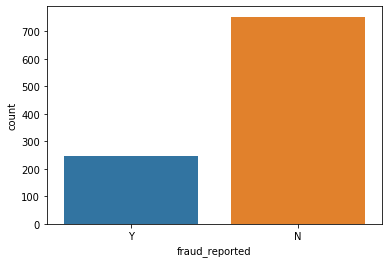

In [19]:
sns.countplot(x='fraud_reported',data=df_fraud)

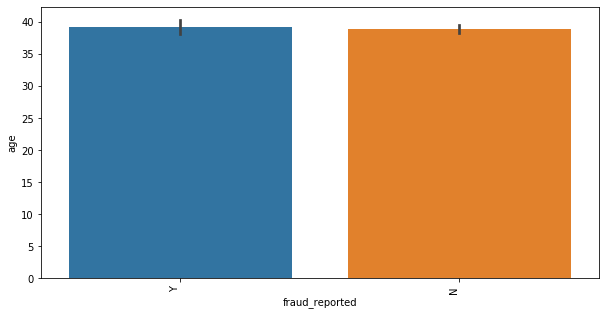

In [20]:
plt.figure(figsize=(10, 5))
ax1=sns.barplot(x='fraud_reported',y='age',data=df_fraud)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

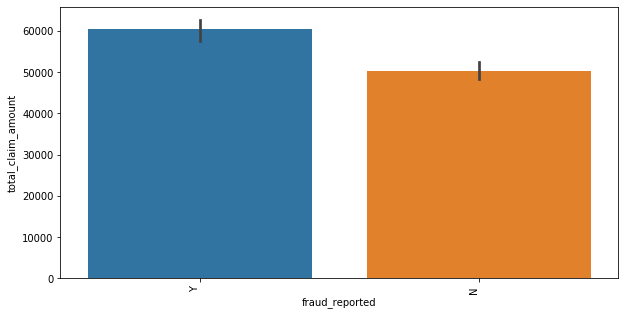

In [21]:
plt.figure(figsize=(10, 5))
ax1=sns.barplot(x='fraud_reported',y='total_claim_amount',data=df_fraud)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

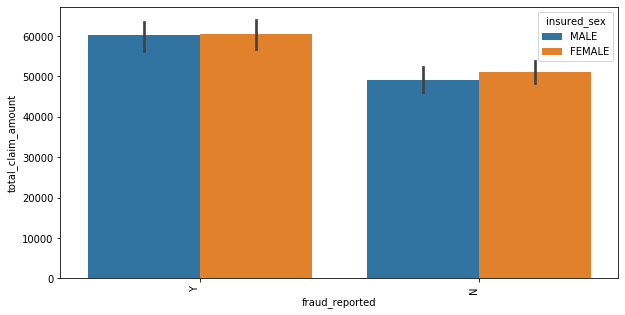

In [22]:
plt.figure(figsize=(10, 5))
ax1=sns.barplot(x='fraud_reported',y='total_claim_amount',hue='insured_sex',data=df_fraud)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

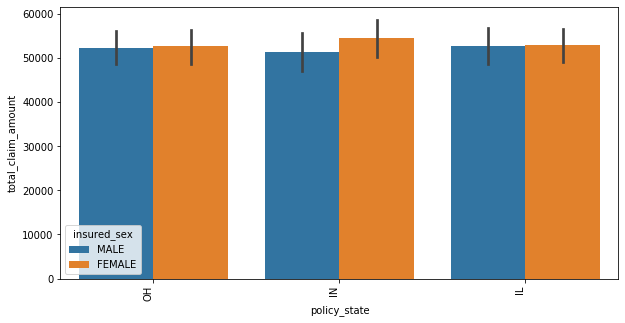

In [23]:
plt.figure(figsize=(10, 5))
ax1=sns.barplot(x='policy_state',y='total_claim_amount',hue='insured_sex',data=df_fraud)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

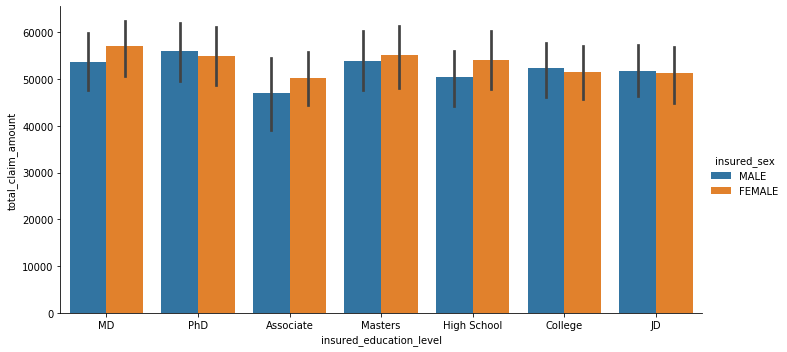

In [24]:
sns.catplot(x='insured_education_level',y='total_claim_amount',hue='insured_sex',kind='bar',data=df_fraud,height=5,aspect=2)

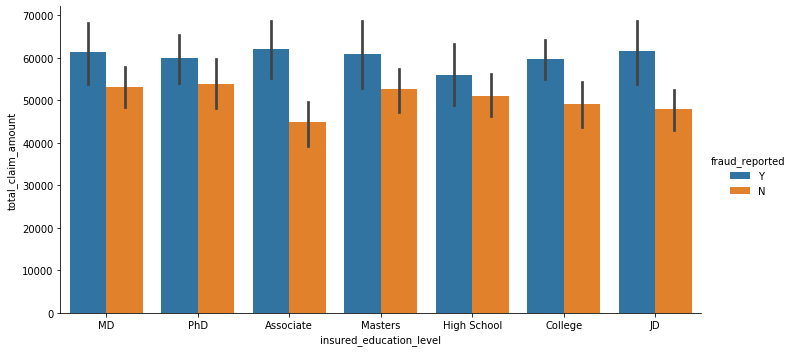

In [25]:
sns.catplot(x='insured_education_level',y='total_claim_amount',hue='fraud_reported',kind='bar',data=df_fraud,height=5,aspect=2)

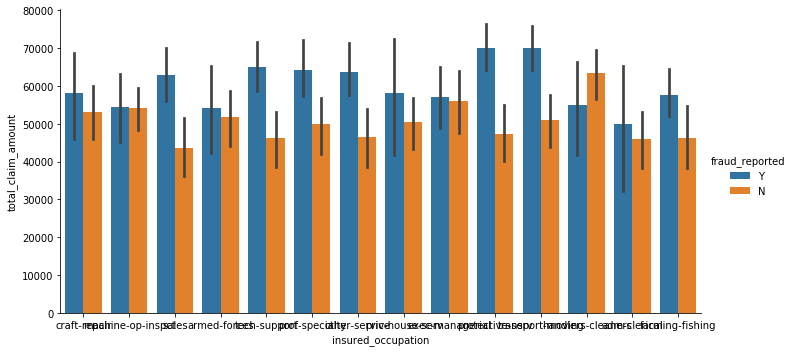

In [26]:
sns.catplot(x='insured_occupation',y='total_claim_amount',hue='fraud_reported',kind='bar',data=df_fraud,height=5,aspect=2)

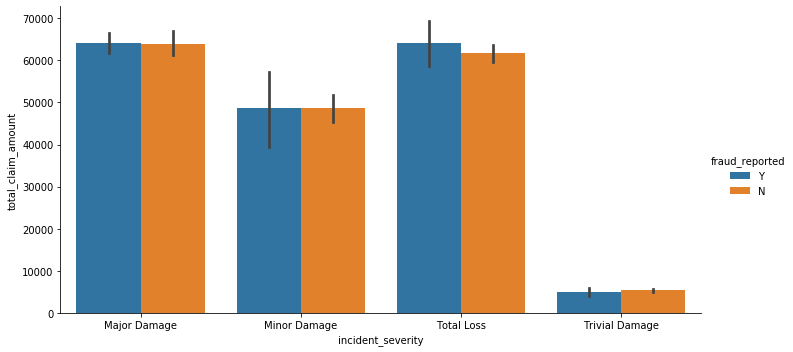

In [27]:
sns.catplot(x='incident_severity',y='total_claim_amount',hue='fraud_reported',kind='bar',data=df_fraud,height=5,aspect=2)

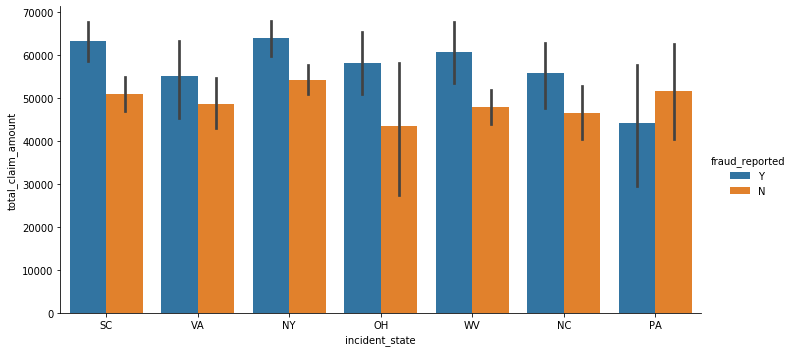

In [28]:
sns.catplot(x='incident_state',y='total_claim_amount',hue='fraud_reported',kind='bar',data=df_fraud,height=5,aspect=2)

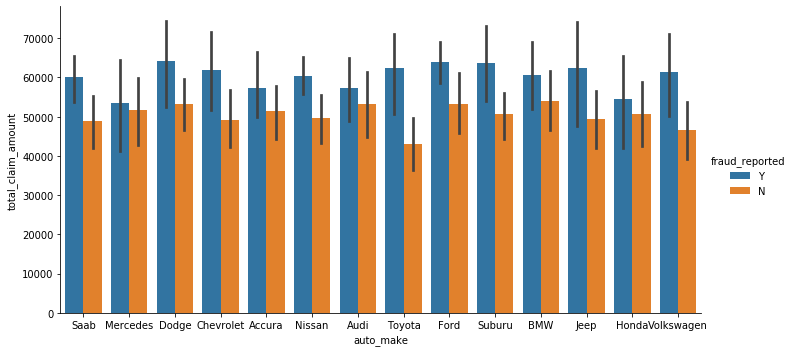

In [29]:
sns.catplot(x='auto_make',y='total_claim_amount',hue='fraud_reported',kind='bar',data=df_fraud,height=5,aspect=2)

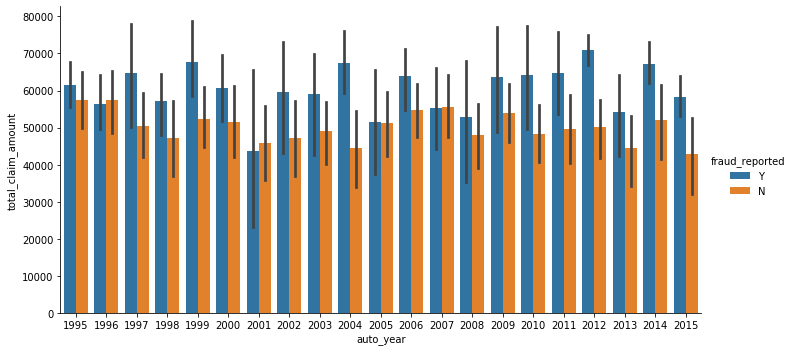

In [30]:
sns.catplot(x='auto_year',y='total_claim_amount',hue='fraud_reported',kind='bar',data=df_fraud,height=5,aspect=2)

In [31]:
df_fraud.dtypes

months_as_customer               int64
age                              int64
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                 object
bodily_injuries          

In [32]:
from sklearn import preprocessing
for cols in df_fraud.columns:
    if df_fraud[cols].dtypes=='object':
        le= preprocessing.LabelEncoder()
        df_fraud[cols] = le.fit_transform(df_fraud[cols])

In [50]:
from sklearn import preprocessing
for cols in df_fraud.columns:
    if df_fraud[cols].dtypes=='float64':
        le= preprocessing.LabelEncoder()
        df_fraud[cols] = le.fit_transform(df_fraud[cols])

In [51]:
df_fraud

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,auto_make,auto_model,auto_year,fraud_reported,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,incident_year
0,328,48,2,1,1000,732,0,486,1,4,...,10,1,2004,1,17,10,2014,25,1,2015
1,228,42,1,1,2000,396,4,519,1,4,...,8,12,2007,1,27,6,2006,21,1,2015
2,134,29,2,0,2000,740,4,6,0,6,...,4,30,2007,0,6,9,2000,22,2,2015
3,256,41,0,1,2000,743,5,812,0,6,...,3,34,2014,1,25,5,1990,10,1,2015
4,228,44,0,2,1000,902,5,850,1,0,...,0,31,2009,0,6,6,2014,17,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2,2,1000,577,0,19,0,5,...,6,6,2006,0,16,7,1991,22,2,2015
996,285,41,0,0,1000,765,0,813,0,6,...,13,28,2015,0,5,1,2014,24,1,2015
997,130,34,2,1,500,691,2,181,0,5,...,11,19,1996,0,17,2,2003,23,1,2015
998,458,62,0,2,2000,652,4,157,1,0,...,1,5,1998,0,18,11,2011,26,2,2015


In [52]:
df_fraud.isna().any(axis=None)

False

In [53]:
df_fraud.corr()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,auto_make,auto_model,auto_year,fraud_reported,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,incident_year
months_as_customer,1.000000,0.922098,-0.000328,-0.026819,0.026807,0.008562,0.021562,0.017497,0.060925,-0.000833,...,0.047655,0.004202,-0.000292,0.020544,0.054809,-0.001559,-0.048276,-0.001455,-0.042826,NaN
age,0.922098,1.000000,-0.014533,-0.015185,0.029188,0.017822,0.023589,0.013517,0.073337,0.000969,...,0.030410,0.017343,0.001354,0.012143,0.056776,0.008357,-0.037444,0.003697,-0.037058,NaN
policy_state,-0.000328,-0.014533,1.000000,0.001027,0.010033,0.014751,-0.024714,0.025074,-0.020481,-0.034327,...,0.017124,-0.025253,0.002114,0.029432,0.011178,0.046871,-0.007276,0.025572,0.018531,NaN
policy_csl,-0.026819,-0.015185,0.001027,1.000000,0.003384,0.017161,0.015821,0.006474,-0.010757,0.009153,...,-0.004701,0.047885,-0.033082,-0.037190,0.010164,-0.021547,-0.016466,-0.007640,-0.030164,NaN
policy_deductable,0.026807,0.029188,0.010033,0.003384,1.000000,-0.000535,0.007264,-0.001630,-0.009733,0.015217,...,-0.035379,-0.003268,0.026105,0.014817,-0.000265,-0.025020,-0.049598,-0.022701,-0.026416,NaN
policy_annual_premium,0.008562,0.017822,0.014751,0.017161,-0.000535,1.000000,-0.001203,0.043082,0.034839,-0.016601,...,0.007216,-0.030185,-0.031015,-0.015261,-0.032354,-0.009393,-0.001079,0.030801,-0.051467,NaN
umbrella_limit,0.021562,0.023589,-0.024714,0.015821,0.007264,-0.001203,1.000000,0.002234,0.015747,-0.028109,...,-0.012087,0.044871,0.001818,0.053855,-0.030505,-0.047860,0.039567,0.003429,-0.007749,NaN
insured_zip,0.017497,0.013517,0.025074,0.006474,-0.001630,0.043082,0.002234,1.000000,-0.034313,0.010645,...,-0.028966,0.029470,-0.027803,0.061767,-0.034216,0.034055,0.008761,0.008115,-0.037381,NaN
insured_sex,0.060925,0.073337,-0.020481,-0.010757,-0.009733,0.034839,0.015747,-0.034313,1.000000,0.009002,...,0.026457,-0.018421,-0.028247,0.030873,0.039769,-0.001042,-0.032891,0.001924,-0.025471,NaN
insured_education_level,-0.000833,0.000969,-0.034327,0.009153,0.015217,-0.016601,-0.028109,0.010645,0.009002,1.000000,...,0.055202,0.049445,0.043509,0.008808,0.042708,-0.082494,0.018952,-0.038402,-0.053106,NaN


In [54]:
df_fraud.skew()

months_as_customer             0.362177
age                            0.478988
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium         -0.004022
umbrella_limit                 1.962930
insured_zip                    0.001683
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
collision_type                -0.177814
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage                0.064799


In [55]:
#Removing skewness
import numpy as np
for index in df_fraud.skew().index:
    if df_fraud.skew().loc[index]>0.5:
        df_fraud[index]=np.sqrt(df_fraud[index])

In [56]:
df_fraud.skew()

months_as_customer             0.362177
age                            0.478988
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium         -0.004022
umbrella_limit                 1.620120
insured_zip                    0.001683
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
collision_type                -0.177814
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.376744
property_damage                0.064799


In [57]:
#Seperate the input and output column
df_x=df_fraud.drop(columns=["fraud_reported"])
df_y=df_fraud[["fraud_reported"]]

In [58]:
print(df_x.shape)
print(df_y.shape)

(1000, 41)
(1000, 1)


In [59]:
df_y.head()

,fraud_reported
0,1.0
1,1.0
2,0.0
3,1.0
4,0.0


#Standard Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(df_x)
df_x=sc.transform(df_x)

In [60]:
df_x

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,vehicle_claim,auto_make,auto_model,auto_year,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,incident_year
0,328,48,2,1,1000,732,0.000000,486,1,4,...,52080,10,1,2004,17,10,2014,25,1,2015
1,228,42,1,1,2000,396,2.000000,519,1,4,...,3510,8,12,2007,27,6,2006,21,1,2015
2,134,29,2,0,2000,740,2.000000,6,0,6,...,23100,4,30,2007,6,9,2000,22,2,2015
3,256,41,0,1,2000,743,2.236068,812,0,6,...,50720,3,34,2014,25,5,1990,10,1,2015
4,228,44,0,2,1000,902,2.236068,850,1,0,...,4550,0,31,2009,6,6,2014,17,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2,2,1000,577,0.000000,19,0,5,...,61040,6,6,2006,16,7,1991,22,2,2015
996,285,41,0,0,1000,765,0.000000,813,0,6,...,72320,13,28,2015,5,1,2014,24,1,2015
997,130,34,2,1,500,691,1.414214,181,0,5,...,52500,11,19,1996,17,2,2003,23,1,2015
998,458,62,0,2,2000,652,2.000000,157,1,0,...,36540,1,5,1998,18,11,2011,26,2,2015


In [61]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc,f1_score,roc_auc_score
from sklearn.model_selection import train_test_split
def maxacc_score(clf,df_x,df_y):
    maxA=0
    rs=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(df_x, df_y,random_state = r_state,test_size=0.20,stratify=df_y)
        clf.fit(x_train,y_train)
        y_pred=clf.predict(x_test)
        tmp=accuracy_score(y_test,y_pred)
        if tmp>maxA:
            maxA=tmp
            rs=r_state
    print("maximum Accuracy is at random state :",rs," and it is :",maxA)
    return rs

In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier

In [63]:
KNN=KNeighborsClassifier(n_neighbors=5)
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier()
GNB=GaussianNB()
RFC=RandomForestClassifier(n_estimators=100)
GBC=GradientBoostingClassifier()
ABC=AdaBoostClassifier()
ETC=ExtraTreesClassifier()

In [64]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DT))
models.append(('GaussianNB', GNB))
models.append(('RandomForestClassifier', RFC))
models.append(('GradientBoostingClassifier', GBC))
models.append(('ExtraTreesClassifier',ETC))
models.append(('AdaBoostClassifier',ABC))

*********************** KNeighborsClassifier ***********************


maximum Accuracy is at random state : 68  and it is : 0.75
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


Accuracy_score =  0.7363636363636363


Cross_Val_Score =  0.7010327032703271


roc_auc_score =  0.5316822846943329


classification_report
               precision    recall  f1-score   support

         0.0       0.77      0.93      0.84       166
         1.0       0.39      0.13      0.19        54

    accuracy                           0.74       220
   macro avg       0.58      0.53      0.52       220
weighted avg       0.67      0.74      0.68       220



[[155  11]
 [ 47   7]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*********************** SVC ***********************


maximum Accuracy is at random state : 42  and it is : 0.755
SVC(C=1.0, cache_size=200, 

maximum Accuracy is at random state : 54  and it is : 0.835
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)


Accuracy_score =  0.8045454545454546


Cross_Val_Score =  0.7961682168216824


roc_auc_score =  0.6955600178491744


classification_report
               precision    recall  f1-score   support

         0.0       0.84      0.91      0.88       166
         1.0       0.63      0.48      0.55        54

    accuracy                           0.80       220
   macro avg       0.74      0.70      0.71       220
weighted avg       0.79      0.80      0.79       220



[[151  15]
 [ 28  26]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)





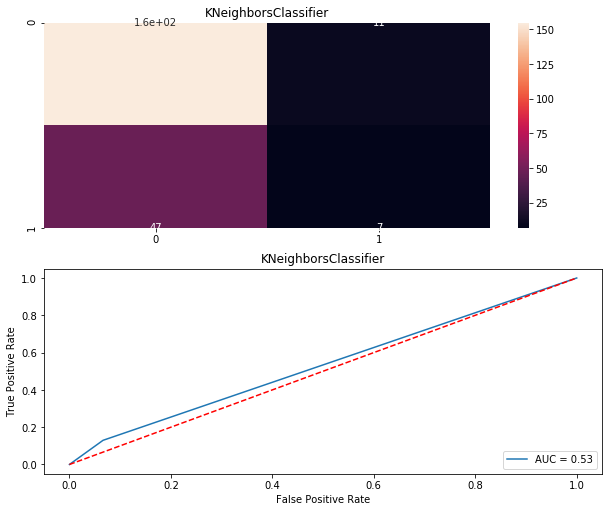

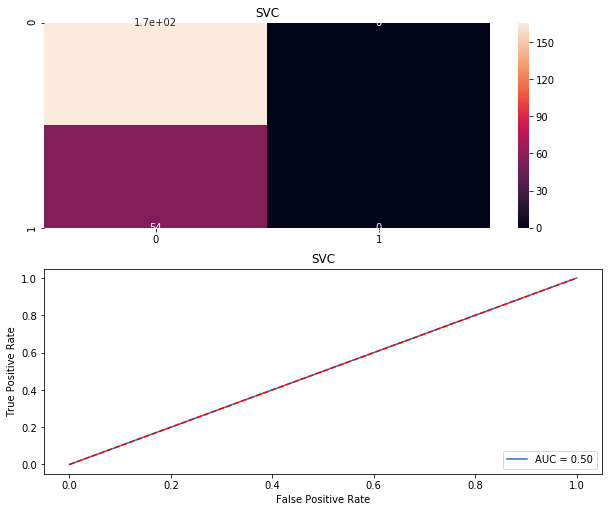

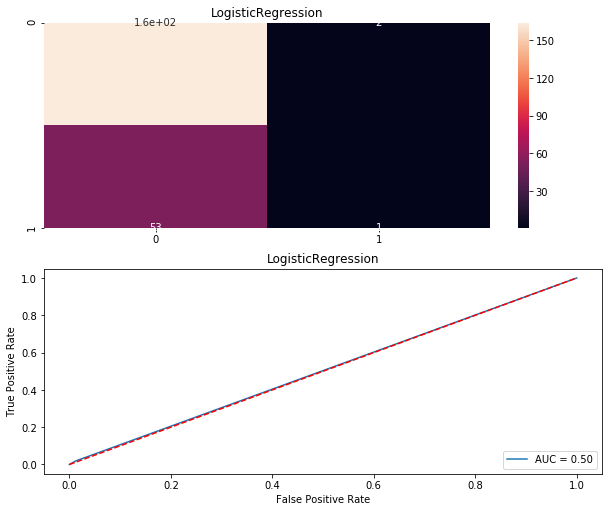

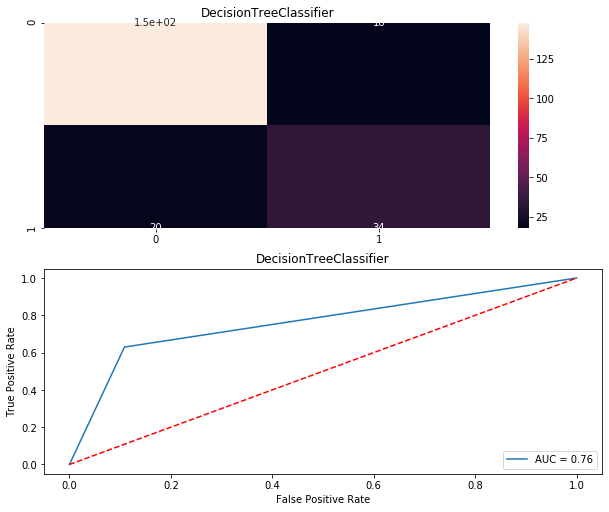

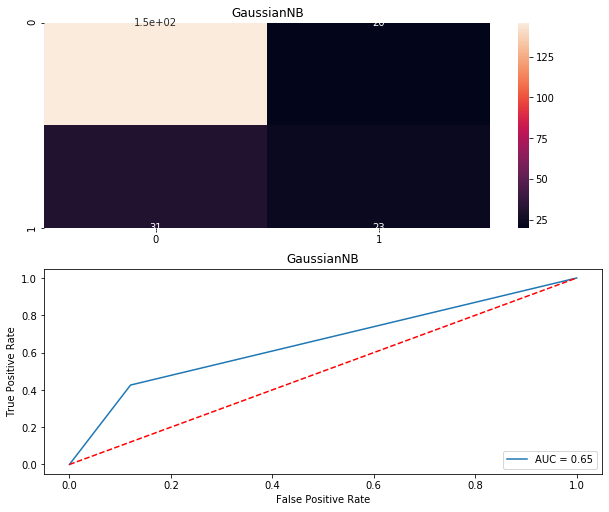

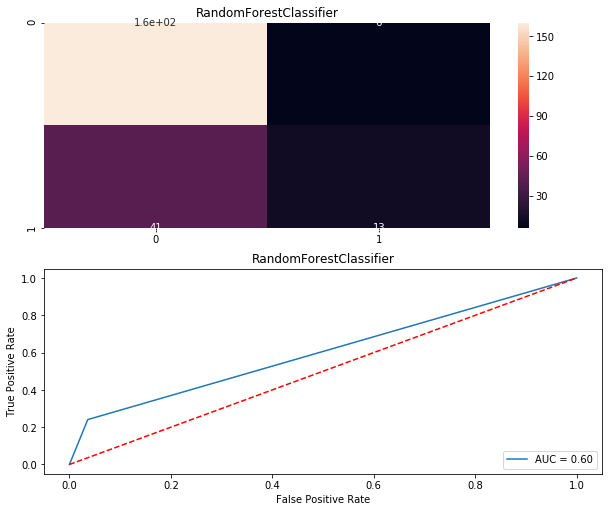

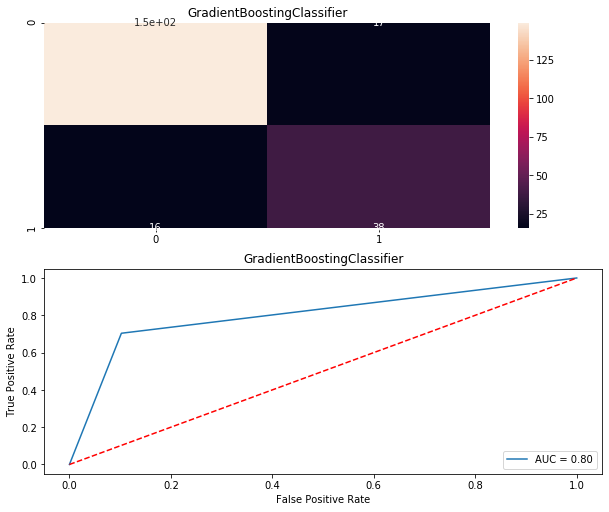

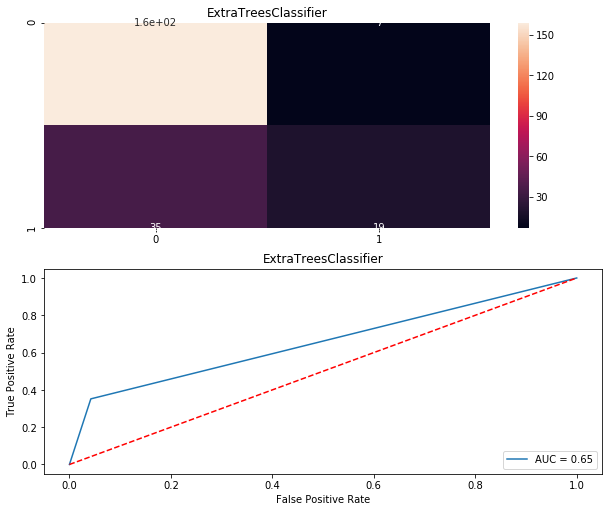

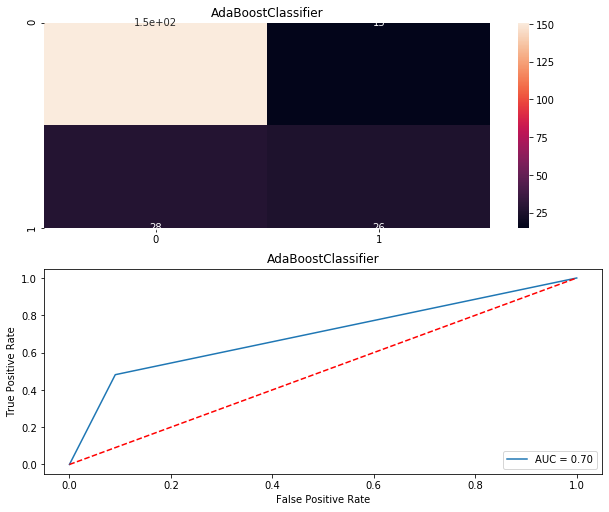

In [65]:
Model = []
score = []
cvs=[]
rocscore=[]
for name,model in models:
    print('***********************',name,'***********************')
    print('\n')
    Model.append(name)
    max_random_state= maxacc_score(model,df_x,df_y)
    x_train,x_test,y_train,y_test=train_test_split(df_x,df_y,random_state=max_random_state,test_size=0.22,stratify=df_y)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model, df_x, df_y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [66]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score ,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
result

,Model,Accuracy_score,Cross_val_score,Roc_auc_curve
0,KNeighborsClassifier,73.636364,70.103270,53.168228
1,SVC,75.454545,75.301530,50.000000
2,LogisticRegression,75.000000,75.499570,50.323516
3,DecisionTreeClassifier,82.727273,78.210701,76.059795
4,GaussianNB,76.818182,71.216322,65.272200
5,RandomForestClassifier,78.636364,76.811651,60.229808
6,GradientBoostingClassifier,85.000000,83.115002,80.064703
7,ExtraTreesClassifier,80.909091,76.002700,65.484159
8,AdaBoostClassifier,80.454545,79.616822,69.556002


In [73]:
x_train,x_test,y_train,y_test=train_test_split(df_x,df_y,random_state=93,test_size=0.22,stratify=df_y)
from sklearn.model_selection import GridSearchCV
parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01,0.05,0.1],
    "min_samples_split": [0.1,0.5,1.0],
    "min_samples_leaf": [10,20,50],
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    }
grid_gbc = GridSearchCV(GradientBoostingClassifier(),parameters,refit=True,verbose=2,cv=10)
grid_gbc.fit(x_train,y_train)

Fitting 10 folds for each of 324 candidates, totalling 3240 fits
[CV] criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=10, min_samples_split=0.1 
[CV]  criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=10, min_samples_split=0.1, total=   0.2s
[CV] criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=10, min_samples_split=0.1 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=10, min_samples_split=0.1, total=   0.2s
[CV] criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=10, min_samples_split=0.1 
[CV]  criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=10, min_samples_split=0.1, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=10, min_samples_split=0.1 
[CV]  criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=10, min_samples_split=0.1, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=10, min_samples_split=0.1 
[CV]  criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1

[CV]  criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=20, min_samples_split=0.1, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=20, min_samples_split=0.1 
[CV]  criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=20, min_samples_split=0.1, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=20, min_samples_split=0.1 
[CV]  criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=20, min_samples_split=0.1, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=20, min_samples_split=0.1 
[CV]  criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=2

[CV]  criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=50, min_samples_split=0.1, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=50, min_samples_split=0.1 
[CV]  criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=50, min_samples_split=0.1, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=50, min_samples_split=0.1 
[CV]  criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=50, min_samples_split=0.1, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=50, min_samples_split=0.1 
[CV]  criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=5

[CV]  criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=10, min_samples_split=0.1, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=10, min_samples_split=0.1 
[CV]  criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=10, min_samples_split=0.1, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=10, min_samples_split=0.1 
[CV]  criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=10, min_samples_split=0.1, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=10, min_samples_split=0.1 
[CV]  criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=1

[CV]  criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0, total=   0.0s
[CV] criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.1 
[CV]  criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.1, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.1 
[CV]  criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=2

[CV]  criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=50, min_samples_split=0.1 
[CV]  criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=5

[CV] criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0, total=   0.0s
[CV] criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0, total=   0.0s
[CV] criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10

[CV]  criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=1.0, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=1.0, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=1.0, total=   0.0s
[CV] criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=0.1 
[CV]  criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=2

[CV]  criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=1.0, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=1.0, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=50, min_samples_split=0.1 
[CV]  criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=50, min_samples_split=0.1, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=50, min_samples_split=0.1 
[CV]  criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=5

[CV]  criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=50, min_samples_split=1.0, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=50, min_samples_split=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=50, min_samples_split=1.0, total=   0.0s
[CV] criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=50, min_samples_split=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=50, min_samples_split=1.0, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=50, min_samples_split=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=5

[CV]  criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0, total=   0.0s
[CV] criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1

[CV]  criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=2

[CV]  criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=5

[CV]  criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=10, min_samples_split=1.0, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=10, min_samples_split=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=10, min_samples_split=1.0, total=   0.0s
[CV] criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=10, min_samples_split=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=10, min_samples_split=1.0, total=   0.0s
[CV] criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=10, min_samples_split=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=1

[CV]  criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=20, min_samples_split=1.0, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=20, min_samples_split=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=20, min_samples_split=1.0, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=20, min_samples_split=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=20, min_samples_split=1.0, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=20, min_samples_split=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=2

[CV]  criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=50, min_samples_split=1.0, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=50, min_samples_split=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=50, min_samples_split=1.0, total=   0.0s
[CV] criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=50, min_samples_split=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=50, min_samples_split=1.0, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=50, min_samples_split=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=5

[CV]  criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=1

[CV]  criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0, total=   0.0s
[CV] criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=2

[CV]  criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=50, min_samples_split=0.5, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=5

[CV]  criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=10, min_samples_split=0.5, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=10, min_samples_split=0.5 
[CV]  criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=10, min_samples_split=0.5, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=10, min_samples_split=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=10, min_samples_split=1.0, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=10, min_samples_split=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1

[CV]  criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=20, min_samples_split=0.5, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=20, min_samples_split=0.5 
[CV]  criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=20, min_samples_split=0.5, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=20, min_samples_split=0.5 
[CV]  criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=20, min_samples_split=0.5, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=20, min_samples_split=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=2

[CV]  criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=50, min_samples_split=0.5, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=50, min_samples_split=0.5 
[CV]  criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=50, min_samples_split=0.5, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=50, min_samples_split=0.5 
[CV]  criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=50, min_samples_split=0.5, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=50, min_samples_split=0.5 
[CV]  criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=5

[CV]  criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=10, min_samples_split=0.5, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=10, min_samples_split=0.5 
[CV]  criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=10, min_samples_split=0.5, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=10, min_samples_split=0.5 
[CV]  criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=10, min_samples_split=0.5, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=10, min_samples_split=0.5 
[CV]  criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=1

[CV]  criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.5, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.5 
[CV]  criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.5, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.5 
[CV]  criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.5, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.5 
[CV]  criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=2

[CV]  criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=50, min_samples_split=0.5, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=50, min_samples_split=0.5 
[CV]  criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=50, min_samples_split=0.5, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=50, min_samples_split=0.5 
[CV]  criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=50, min_samples_split=0.5, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=50, min_samples_split=0.5 
[CV]  criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=5

[CV]  criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=0.5, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=0.5 
[CV]  criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=0.5, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=0.5 
[CV]  criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=0.5, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=0.5 
[CV]  criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1

[CV]  criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=0.5, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=0.5 
[CV]  criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=0.5, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=0.5 
[CV]  criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=0.5, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=0.5 
[CV]  criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=2

[CV]  criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=50, min_samples_split=0.5, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=50, min_samples_split=0.5 
[CV]  criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=50, min_samples_split=0.5, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=50, min_samples_split=0.5 
[CV]  criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=50, min_samples_split=0.5, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=50, min_samples_split=0.5 
[CV]  criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=5

[CV]  criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=0.1, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=0.5 
[CV]  criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=0.5, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=0.5 
[CV]  criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=0.5, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=0.5 
[CV]  criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1

[CV]  criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.1, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.1 
[CV]  criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.1, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.5 
[CV]  criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.5, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.5 
[CV]  criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=2

[CV]  criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=50, min_samples_split=0.1, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=50, min_samples_split=0.1 
[CV]  criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=50, min_samples_split=0.1, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=50, min_samples_split=0.1 
[CV]  criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=50, min_samples_split=0.1, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=50, min_samples_split=0.1 
[CV]  criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=5

[CV]  criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=10, min_samples_split=0.1, total=   0.2s
[CV] criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=10, min_samples_split=0.1 
[CV]  criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=10, min_samples_split=0.1, total=   0.2s
[CV] criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=10, min_samples_split=0.1 
[CV]  criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=10, min_samples_split=0.1, total=   0.2s
[CV] criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=10, min_samples_split=0.1 
[CV]  criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=1

[CV]  criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=20, min_samples_split=0.1, total=   0.2s
[CV] criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=20, min_samples_split=0.1 
[CV]  criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=20, min_samples_split=0.1, total=   0.2s
[CV] criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=20, min_samples_split=0.1 
[CV]  criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=20, min_samples_split=0.1, total=   0.2s
[CV] criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=20, min_samples_split=0.1 
[CV]  criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=2

[CV]  criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=50, min_samples_split=0.1, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=50, min_samples_split=0.1 
[CV]  criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=50, min_samples_split=0.1, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=50, min_samples_split=0.1 
[CV]  criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=50, min_samples_split=0.1, total=   0.2s
[CV] criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=50, min_samples_split=0.1 
[CV]  criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=5

[CV]  criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=0.1, total=   0.3s
[CV] criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=0.1 
[CV]  criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=0.1, total=   0.2s
[CV] criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=0.1 
[CV]  criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=0.1, total=   0.2s
[CV] criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=0.1 
[CV]  criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=1

[CV]  criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.1, total=   0.2s
[CV] criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.1 
[CV]  criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.1, total=   0.5s
[CV] criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.1 
[CV]  criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.1, total=   0.4s
[CV] criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.1 
[CV]  criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=2

[CV]  criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=50, min_samples_split=0.1 
[CV]  criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=50, min_samples_split=0.1, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=50, min_samples_split=0.1 
[CV]  criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=5

[CV]  criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=10, min_samples_split=0.1 
[CV]  criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=10, min_samples_split=0.1, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=10, min_samples_split=0.1 
[CV]  criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=10, min_samples_split=0.1, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=10, min_samples_split=0.1 
[CV]  criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=10, min

[CV]  criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=10, min_samples_split=1.0, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=10, min_samples_split=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=10, min_samples_split=1.0, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=10, min_samples_split=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=10, min_samples_split=1.0, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=20, min_samples_split=0.1 
[CV]  criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=20, min_

[CV] criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=20, min_samples_split=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=20, min_samples_split=1.0, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=20, min_samples_split=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=20, min_samples_split=1.0, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=50, min_samples_split=0.1 
[CV]  criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=50, min_samples_split=0.1, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=50, min_s

[CV]  criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=50, min_samples_split=1.0, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=50, min_samples_split=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=50, min_samples_split=1.0, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=50, min_samples_split=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=50, min_samples_split=1.0, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=10, min_samples_split=0.1 
[CV]  criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=10, min_

[CV]  criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.1 
[CV]  criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.1, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.1 
[CV]  criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=20, min_

[CV]  criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0, total=   0.0s
[CV] criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=50, min_samples_split=0.1 
[CV]  criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=50, min_samples_split=0.1, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=50, min_samples_split=0.1 
[CV]  criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=50, min_

[CV]  criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=0.1 
[CV]  criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_

[CV]  criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=1.0, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=1.0, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=1.0, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=0.1 
[CV]  criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=20, min_

[CV]  criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=1.0, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=1.0, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=1.0, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=20, min_

[CV]  criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=50, min_samples_split=1.0, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=50, min_samples_split=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=50, min_samples_split=1.0, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=50, min_samples_split=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=50, min_samples_split=1.0, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=50, min_samples_split=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=50, min_

[CV]  criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0, total=   0.0s
[CV] criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_

[CV]  criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_

[CV]  criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=10, min_samples_split=0.1 
[CV]  criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=10, min_

[CV]  criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=10, min_samples_split=1.0, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=10, min_samples_split=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=10, min_samples_split=1.0, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=10, min_samples_split=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=10, min_samples_split=1.0, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=20, min_samples_split=0.1 
[CV]  criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=20, min_

[CV]  criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=20, min_samples_split=1.0, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=20, min_samples_split=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=20, min_samples_split=1.0, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=20, min_samples_split=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=20, min_samples_split=1.0, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=50, min_samples_split=0.1 
[CV]  criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=50, min_

[CV]  criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=50, min_samples_split=1.0, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=50, min_samples_split=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=50, min_samples_split=1.0, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=50, min_samples_split=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=50, min_samples_split=1.0, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=0.1 
[CV]  criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_

[CV]  criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.1 
[CV]  criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_

[CV]  criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_

[CV]  criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0, total=   0.1s
[CV] criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0, total=   0.0s
[CV] criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0 
[CV]  criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=50, min_

[CV]  criterion=mae, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=10, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=10, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=10, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=10, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=10, min_samples_split=1.0, total=   0.5s
[CV] criterion=mae, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=10, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=10, min_samples_split=1.0, total=   0.5s
[CV] criterion=mae, lea

[CV]  criterion=mae, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=20, min_samples_split=1.0, total=   0.5s
[CV] criterion=mae, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=20, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=20, min_samples_split=1.0, total=   0.5s
[CV] criterion=mae, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=20, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=20, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=20, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=20, min_samples_split=1.0, total=   0.7s
[CV] criterion=mae, lea

[CV]  criterion=mae, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=50, min_samples_split=1.0, total=   0.8s
[CV] criterion=mae, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=50, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=50, min_samples_split=1.0, total=   0.8s
[CV] criterion=mae, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=50, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=50, min_samples_split=1.0, total=   0.7s
[CV] criterion=mae, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=50, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=50, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, lea

[CV]  criterion=mae, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0, total=   0.8s
[CV] criterion=mae, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0, total=   0.7s
[CV] criterion=mae, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0, total=   0.7s
[CV] criterion=mae, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0, total=   0.8s
[CV] criterion=mae, lea

[CV]  criterion=mae, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0, total=   0.8s
[CV] criterion=mae, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0, total=   0.7s
[CV] criterion=mae, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0, total=   0.7s
[CV] criterion=mae, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0, total=   0.7s
[CV] criterion=mae, lea

[CV]  criterion=mae, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, lea

[CV]  criterion=mae, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=1.0, total=   0.5s
[CV] criterion=mae, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=1.0, total=   0.7s
[CV] criterion=mae, lea

[CV]  criterion=mae, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=1.0, total=   0.7s
[CV] criterion=mae, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=1.0, total=   0.5s
[CV] criterion=mae, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, lea

[CV]  criterion=mae, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=50, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=50, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=50, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=50, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=50, min_samples_split=1.0, total=   0.7s
[CV] criterion=mae, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=50, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=50, min_samples_split=1.0, total=   0.7s
[CV] criterion=mae, lea

[CV]  criterion=mae, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0, total=   0.7s
[CV] criterion=mae, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0, total=   0.8s
[CV] criterion=mae, lea

[CV]  criterion=mae, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0, total=   0.7s
[CV] criterion=mae, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, lea

[CV]  criterion=mae, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0, total=   1.0s
[CV] criterion=mae, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0, total=   0.8s
[CV] criterion=mae, lea

[CV]  criterion=mae, learning_rate=0.01, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=10, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, learning_rate=0.01, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=10, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.01, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=10, min_samples_split=1.0, total=   0.7s
[CV] criterion=mae, learning_rate=0.01, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=10, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.01, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=10, min_samples_split=1.0, total=   0.8s
[CV] criterion=mae, learning_rate=0.01, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=10, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.01, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=10, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, lea

[CV]  criterion=mae, learning_rate=0.01, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=20, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, learning_rate=0.01, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=20, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.01, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=20, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, learning_rate=0.01, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=20, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.01, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=20, min_samples_split=1.0, total=   0.8s
[CV] criterion=mae, learning_rate=0.01, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=20, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.01, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=20, min_samples_split=1.0, total=   0.7s
[CV] criterion=mae, lea

[CV]  criterion=mae, learning_rate=0.01, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=50, min_samples_split=1.0, total=   0.5s
[CV] criterion=mae, learning_rate=0.01, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=50, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.01, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=50, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, learning_rate=0.01, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=50, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.01, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=50, min_samples_split=1.0, total=   0.5s
[CV] criterion=mae, learning_rate=0.01, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=50, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.01, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=50, min_samples_split=1.0, total=   0.5s
[CV] criterion=mae, lea

[CV]  criterion=mae, learning_rate=0.01, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, learning_rate=0.01, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.01, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, learning_rate=0.01, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.01, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0, total=   0.7s
[CV] criterion=mae, learning_rate=0.01, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.01, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0, total=   0.7s
[CV] criterion=mae, lea

[CV]  criterion=mae, learning_rate=0.01, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0, total=   0.8s
[CV] criterion=mae, learning_rate=0.01, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.01, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, learning_rate=0.01, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.01, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, learning_rate=0.01, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.01, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, lea

[CV]  criterion=mae, learning_rate=0.01, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, learning_rate=0.01, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.01, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0, total=   0.7s
[CV] criterion=mae, learning_rate=0.01, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.01, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, learning_rate=0.01, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.01, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, lea

[CV]  criterion=mae, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=10, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=10, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=10, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=10, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=10, min_samples_split=1.0, total=   0.7s
[CV] criterion=mae, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=10, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=10, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, lea

[CV]  criterion=mae, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=20, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=20, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=20, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=20, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=20, min_samples_split=1.0, total=   0.5s
[CV] criterion=mae, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=20, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=20, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, lea

[CV]  criterion=mae, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=50, min_samples_split=1.0, total=   0.5s
[CV] criterion=mae, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=50, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=50, min_samples_split=1.0, total=   0.5s
[CV] criterion=mae, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=50, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=50, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=50, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=50, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, lea

[CV]  criterion=mae, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0, total=   0.7s
[CV] criterion=mae, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, lea

[CV]  criterion=mae, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0, total=   0.7s
[CV] criterion=mae, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, lea

[CV]  criterion=mae, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, lea

[CV]  criterion=mae, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=1.0, total=   0.5s
[CV] criterion=mae, lea

[CV]  criterion=mae, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=1.0, total=   0.5s
[CV] criterion=mae, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, lea

[CV]  criterion=mae, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=50, min_samples_split=1.0, total=   0.5s
[CV] criterion=mae, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=50, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=50, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=50, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=50, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=50, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=50, min_samples_split=1.0, total=   0.5s
[CV] criterion=mae, lea

[CV]  criterion=mae, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0, total=   0.7s
[CV] criterion=mae, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0, total=   0.7s
[CV] criterion=mae, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0, total=   0.7s
[CV] criterion=mae, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, lea

[CV]  criterion=mae, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0, total=   0.7s
[CV] criterion=mae, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, lea

[CV]  criterion=mae, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0, total=   0.7s
[CV] criterion=mae, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0, total=   0.7s
[CV] criterion=mae, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, lea

[CV]  criterion=mae, learning_rate=0.05, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=10, min_samples_split=1.0, total=   0.7s
[CV] criterion=mae, learning_rate=0.05, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=10, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.05, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=10, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, learning_rate=0.05, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=10, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.05, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=10, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, learning_rate=0.05, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=10, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.05, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=10, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, lea

[CV]  criterion=mae, learning_rate=0.05, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=20, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, learning_rate=0.05, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=20, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.05, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=20, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, learning_rate=0.05, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=20, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.05, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=20, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, learning_rate=0.05, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=20, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.05, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=20, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, lea

[CV]  criterion=mae, learning_rate=0.05, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=50, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, learning_rate=0.05, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=50, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.05, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=50, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, learning_rate=0.05, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=50, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.05, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=50, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, learning_rate=0.05, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=50, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.05, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=50, min_samples_split=1.0, total=   0.5s
[CV] criterion=mae, lea

[CV]  criterion=mae, learning_rate=0.05, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0, total=   0.8s
[CV] criterion=mae, learning_rate=0.05, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.05, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0, total=   0.7s
[CV] criterion=mae, learning_rate=0.05, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.05, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0, total=   0.7s
[CV] criterion=mae, learning_rate=0.05, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.05, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0, total=   0.7s
[CV] criterion=mae, lea

[CV]  criterion=mae, learning_rate=0.05, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0, total=   0.8s
[CV] criterion=mae, learning_rate=0.05, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.05, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0, total=   0.8s
[CV] criterion=mae, learning_rate=0.05, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.05, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0, total=   0.8s
[CV] criterion=mae, learning_rate=0.05, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.05, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0, total=   1.1s
[CV] criterion=mae, lea

[CV]  criterion=mae, learning_rate=0.05, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0, total=   0.7s
[CV] criterion=mae, learning_rate=0.05, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.05, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0, total=   1.0s
[CV] criterion=mae, learning_rate=0.05, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.05, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0, total=   0.8s
[CV] criterion=mae, learning_rate=0.05, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.05, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0, total=   1.0s
[CV] criterion=mae, lea

[CV]  criterion=mae, learning_rate=0.1, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=10, min_samples_split=1.0, total=   0.9s
[CV] criterion=mae, learning_rate=0.1, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=10, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.1, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=10, min_samples_split=1.0, total=   1.0s
[CV] criterion=mae, learning_rate=0.1, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=10, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.1, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=10, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, learning_rate=0.1, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=10, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.1, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=10, min_samples_split=1.0, total=   0.7s
[CV] criterion=mae, learning_r

[CV]  criterion=mae, learning_rate=0.1, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=20, min_samples_split=1.0, total=   0.7s
[CV] criterion=mae, learning_rate=0.1, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=20, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.1, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=20, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, learning_rate=0.1, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=20, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.1, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=20, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, learning_rate=0.1, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=20, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.1, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=20, min_samples_split=1.0, total=   1.0s
[CV] criterion=mae, learning_r

[CV]  criterion=mae, learning_rate=0.1, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=50, min_samples_split=1.0, total=   0.7s
[CV] criterion=mae, learning_rate=0.1, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=50, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.1, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=50, min_samples_split=1.0, total=   1.0s
[CV] criterion=mae, learning_rate=0.1, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=50, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.1, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=50, min_samples_split=1.0, total=   0.7s
[CV] criterion=mae, learning_rate=0.1, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=50, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.1, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=50, min_samples_split=1.0, total=   0.7s
[CV] criterion=mae, learning_r

[CV]  criterion=mae, learning_rate=0.1, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0, total=   1.1s
[CV] criterion=mae, learning_rate=0.1, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.1, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0, total=   1.0s
[CV] criterion=mae, learning_rate=0.1, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.1, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0, total=   0.8s
[CV] criterion=mae, learning_rate=0.1, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.1, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0, total=   0.8s
[CV] criterion=mae, learning_r

[CV]  criterion=mae, learning_rate=0.1, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0, total=   1.0s
[CV] criterion=mae, learning_rate=0.1, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.1, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0, total=   0.9s
[CV] criterion=mae, learning_rate=0.1, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.1, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0, total=   0.8s
[CV] criterion=mae, learning_rate=0.1, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.1, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0, total=   0.8s
[CV] criterion=mae, learning_r

[CV]  criterion=mae, learning_rate=0.1, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0, total=   0.8s
[CV] criterion=mae, learning_rate=0.1, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.1, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0, total=   0.8s
[CV] criterion=mae, learning_rate=0.1, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.1, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0, total=   0.8s
[CV] criterion=mae, learning_rate=0.1, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.1, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0, total=   0.7s
[CV] criterion=mae, learning_r

[CV]  criterion=mae, learning_rate=0.1, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=1.0, total=   0.7s
[CV] criterion=mae, learning_rate=0.1, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.1, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=1.0, total=   0.8s
[CV] criterion=mae, learning_rate=0.1, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.1, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=1.0, total=   0.7s
[CV] criterion=mae, learning_rate=0.1, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.1, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=1.0, total=   0.8s
[CV] criterion=mae, learning_r

[CV]  criterion=mae, learning_rate=0.1, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=1.0, total=   0.8s
[CV] criterion=mae, learning_rate=0.1, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.1, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=1.0, total=   0.8s
[CV] criterion=mae, learning_rate=0.1, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.1, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=1.0, total=   0.7s
[CV] criterion=mae, learning_rate=0.1, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.1, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, learning_r

[CV]  criterion=mae, learning_rate=0.1, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=50, min_samples_split=1.0, total=   0.9s
[CV] criterion=mae, learning_rate=0.1, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=50, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.1, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=50, min_samples_split=1.0, total=   1.2s
[CV] criterion=mae, learning_rate=0.1, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=50, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.1, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=50, min_samples_split=1.0, total=   1.1s
[CV] criterion=mae, learning_rate=0.1, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=50, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.1, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=50, min_samples_split=1.0, total=   1.1s
[CV] criterion=mae, learning_r

[CV]  criterion=mae, learning_rate=0.1, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0, total=   1.4s
[CV] criterion=mae, learning_rate=0.1, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.1, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0, total=   1.2s
[CV] criterion=mae, learning_rate=0.1, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.1, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0, total=   1.5s
[CV] criterion=mae, learning_rate=0.1, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.1, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0, total=   1.2s
[CV] criterion=mae, learning_r

[CV]  criterion=mae, learning_rate=0.1, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0, total=   1.0s
[CV] criterion=mae, learning_rate=0.1, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.1, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0, total=   1.1s
[CV] criterion=mae, learning_rate=0.1, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.1, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0, total=   1.0s
[CV] criterion=mae, learning_rate=0.1, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.1, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0, total=   1.0s
[CV] criterion=mae, learning_r

[CV]  criterion=mae, learning_rate=0.1, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0, total=   0.7s
[CV] criterion=mae, learning_rate=0.1, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.1, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0, total=   0.7s
[CV] criterion=mae, learning_rate=0.1, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.1, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0, total=   0.7s
[CV] criterion=mae, learning_rate=0.1, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.1, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0, total=   0.7s
[CV] criterion=mae, learning_r

[CV]  criterion=mae, learning_rate=0.1, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=10, min_samples_split=1.0, total=   0.7s
[CV] criterion=mae, learning_rate=0.1, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=10, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.1, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=10, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, learning_rate=0.1, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=10, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.1, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=10, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, learning_rate=0.1, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=10, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.1, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=10, min_samples_split=1.0, total=   0.9s
[CV] criterion=mae, learning_r

[CV]  criterion=mae, learning_rate=0.1, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=20, min_samples_split=1.0, total=   0.7s
[CV] criterion=mae, learning_rate=0.1, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=20, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.1, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=20, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, learning_rate=0.1, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=20, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.1, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=20, min_samples_split=1.0, total=   0.7s
[CV] criterion=mae, learning_rate=0.1, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=20, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.1, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=20, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, learning_r

[CV]  criterion=mae, learning_rate=0.1, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=50, min_samples_split=1.0, total=   0.6s
[CV] criterion=mae, learning_rate=0.1, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=50, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.1, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=50, min_samples_split=1.0, total=   0.7s
[CV] criterion=mae, learning_rate=0.1, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=50, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.1, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=50, min_samples_split=1.0, total=   0.7s
[CV] criterion=mae, learning_rate=0.1, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=50, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.1, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=50, min_samples_split=1.0, total=   0.7s
[CV] criterion=mae, learning_r

[CV]  criterion=mae, learning_rate=0.1, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0, total=   0.7s
[CV] criterion=mae, learning_rate=0.1, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.1, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0, total=   0.8s
[CV] criterion=mae, learning_rate=0.1, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.1, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0, total=   0.9s
[CV] criterion=mae, learning_rate=0.1, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.1, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=1.0, total=   0.7s
[CV] criterion=mae, learning_r

[CV]  criterion=mae, learning_rate=0.1, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0, total=   0.9s
[CV] criterion=mae, learning_rate=0.1, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.1, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0, total=   0.8s
[CV] criterion=mae, learning_rate=0.1, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.1, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0, total=   0.9s
[CV] criterion=mae, learning_rate=0.1, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.1, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=1.0, total=   0.7s
[CV] criterion=mae, learning_r

[CV]  criterion=mae, learning_rate=0.1, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0, total=   0.7s
[CV] criterion=mae, learning_rate=0.1, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.1, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0, total=   0.7s
[CV] criterion=mae, learning_rate=0.1, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.1, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0, total=   0.7s
[CV] criterion=mae, learning_rate=0.1, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0 
[CV]  criterion=mae, learning_rate=0.1, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=50, min_samples_split=1.0, total=   0.7s


[Parallel(n_jobs=1)]: Done 3240 out of 3240 | elapsed: 37.2min finished
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_n...
                                                  validation_fractio

In [74]:
print(grid_gbc.best_estimator_)
print(grid_gbc.best_score_)

GradientBoostingClassifier(criterion='mae', init=None, learning_rate=0.1,
                           loss='deviance', max_depth=3, max_features='log2',
                           max_leaf_nodes=None, min_impurity_decrease=0.0,
                           min_impurity_split=None, min_samples_leaf=20,
                           min_samples_split=0.5, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           presort='auto', random_state=None, subsample=1.0,
                           tol=0.0001, validation_fraction=0.1, verbose=0,
                           warm_start=False)
0.8


In [75]:
grid_gbc_pred = grid_gbc.predict(x_test)
print("Confusion matrix \n",confusion_matrix(y_test,grid_gbc_pred))
print("f1 score is : ",f1_score(y_test,grid_gbc_pred))
print("Accuracy score is : ",accuracy_score(y_test,grid_gbc_pred))
print("classification report \n",classification_report(y_test,grid_gbc_pred))
print("AUC ROC Score: ",roc_auc_score(y_test,grid_gbc_pred))

Confusion matrix 
 [[147  19]
 [ 23  31]]
f1 score is :  0.5961538461538461
Accuracy score is :  0.8090909090909091
classification report 
               precision    recall  f1-score   support

         0.0       0.86      0.89      0.88       166
         1.0       0.62      0.57      0.60        54

    accuracy                           0.81       220
   macro avg       0.74      0.73      0.74       220
weighted avg       0.80      0.81      0.81       220

AUC ROC Score:  0.7298081213743864


In [ ]:
#Select  GradientBoostingClassifier as final model ,because of higher accuracy score
GBC=GradientBoostingClassifier()

In [76]:
from sklearn.externals import joblib
joblib.dump(GBC,"model_auto_insurance_fraud.csv")

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['model_auto_insurance_fraud.csv']